In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricitymaps-argentina-yearly/electricitymaps_argentina_yearly_2021.csv
/kaggle/input/electricitymaps-argentina-yearly/electricitymaps_argentina_yearly_2022.csv
/kaggle/input/electricitymaps-argentina-yearly/electricitymaps_argentina_yearly_2023.csv


In [2]:
import pandas as pd

# Ruta al dataset en Kaggle
DATA_DIR = "/kaggle/input/electricitymaps-argentina-yearly"

# Cargar un archivo de ejemplo
df2021 = pd.read_csv(f"{DATA_DIR}/electricitymaps_argentina_yearly_2021.csv")

# Ver las primeras filas
df2021.head()


,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method
0,2021-01-01 00:00:00,Argentina,Argentina,AR,260.33,348.21,34.46,27.39,portalweb.cammesa.com; Electricity Maps Estima...,True,ESTIMATED_TIME_SLICER_AVERAGE


In [3]:
import pandas as pd
from pathlib import Path

# Ruta al dataset Kaggle
DATA_DIR = Path("/kaggle/input/electricitymaps-argentina-yearly")

# Archivos disponibles
files = [
    DATA_DIR / "electricitymaps_argentina_yearly_2021.csv",
    DATA_DIR / "electricitymaps_argentina_yearly_2022.csv",
    DATA_DIR / "electricitymaps_argentina_yearly_2023.csv",
]

# Cargar y concatenar
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Asegurar formato datetime
df["Datetime (UTC)"] = pd.to_datetime(df["Datetime (UTC)"])

# Extraer año y mes
df["year"] = df["Datetime (UTC)"].dt.year
df["month"] = df["Datetime (UTC)"].dt.month

# Resumen anual
yearly_summary = (
    df.groupby("year")
      .agg(
          avg_carbon_intensity_direct=("Carbon intensity gCO₂eq/kWh (direct)", "mean"),
          avg_carbon_intensity_lifecycle=("Carbon intensity gCO₂eq/kWh (Life cycle)", "mean"),
          avg_cfe=("Carbon-free energy percentage (CFE%)", "mean"),
          avg_re=("Renewable energy percentage (RE%)", "mean")
      )
      .reset_index()
)

yearly_summary


,year,avg_carbon_intensity_direct,avg_carbon_intensity_lifecycle,avg_cfe,avg_re
0,2021,260.33,348.21,34.46,27.39
1,2022,324.83,408.47,41.64,36.60
2,2023,292.76,368.19,49.08,42.68


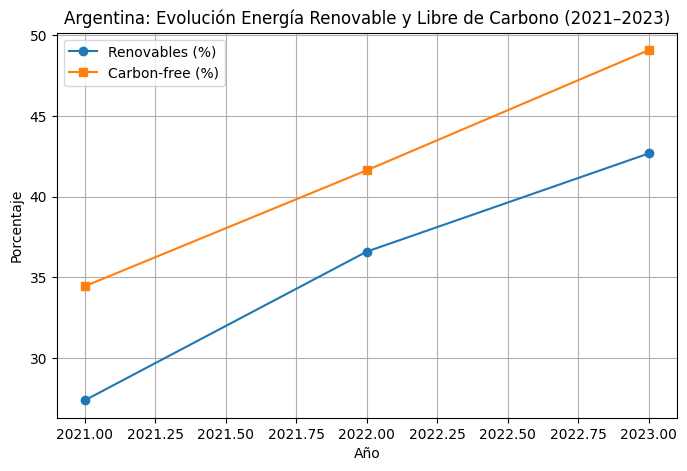

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(yearly_summary["year"], yearly_summary["avg_re"], marker="o", label="Renovables (%)")
plt.plot(yearly_summary["year"], yearly_summary["avg_cfe"], marker="s", label="Carbon-free (%)")
plt.title("Argentina: Evolución Energía Renovable y Libre de Carbono (2021–2023)")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.legend()
plt.grid(True)
plt.show()


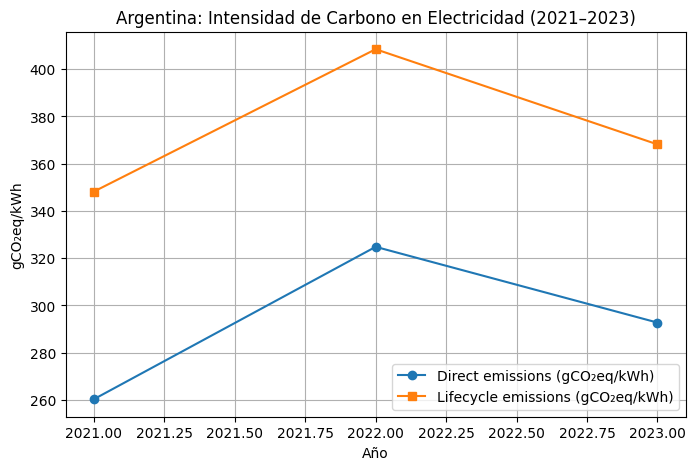

In [5]:
plt.figure(figsize=(8,5))
plt.plot(yearly_summary["year"], yearly_summary["avg_carbon_intensity_direct"], marker="o", label="Direct emissions (gCO₂eq/kWh)")
plt.plot(yearly_summary["year"], yearly_summary["avg_carbon_intensity_lifecycle"], marker="s", label="Lifecycle emissions (gCO₂eq/kWh)")

plt.title("Argentina: Intensidad de Carbono en Electricidad (2021–2023)")
plt.xlabel("Año")
plt.ylabel("gCO₂eq/kWh")
plt.legend()
plt.grid(True)
plt.show()


# 🔎 Conclusiones preliminares (2021–2023)

- **Mayor participación de energías limpias:**  
  - El porcentaje de renovables en la matriz eléctrica argentina subió de **27% en 2021** a **43% en 2023**.  
  - La energía libre de carbono (incluye nuclear + renovables) pasó de **34% a casi 50%** en el mismo período.  

- **Intensidad de carbono con tendencia mixta:**  
  - Las emisiones directas aumentaron en 2022, alcanzando ~325 gCO₂eq/kWh, pero cayeron nuevamente en 2023 a ~293 gCO₂eq/kWh.  
  - La intensidad de ciclo de vida mostró un patrón similar: pico en 2022 (~410 gCO₂eq/kWh) y leve reducción en 2023 (~368 gCO₂eq/kWh).  

- **Insight clave:** La incorporación de renovables y energía libre de carbono es consistente y creciente, aunque la reducción en la intensidad de carbono no es lineal. Esto refleja que la transición energética no depende solo de la capacidad renovable instalada, sino también del uso puntual de combustibles fósiles y de factores de demanda.  

👉 Próximo paso: analizar la **estacionalidad mensual** para ver cómo varían las renovables y la intensidad de carbono a lo largo del año.


# 📌 Próximos pasos
- Explorar datasets **HOURLY o DAILY** para analizar estacionalidad mensual y patrones horarios.
- Integrar otros datos energéticos (ej. Balances Energéticos Nacionales de datos.gob.ar).
- Enriquecer el análisis con contexto ESG (emisiones totales, participación de cada fuente).
